In [13]:
from usda_mmn_utils import *
import openpyxl

In [14]:
markets_df = get_markets_list()
print(markets_df.head())
print(markets_df.tail())

  slug_id                  market_name
0    2277               Atlanta fruits
1    2278           Atlanta vegetables
2    2279  Atlanta onions and potatoes
3    2280                 Atlanta nuts
4    2281             Baltimore fruits
    slug_id                                        market_name
137    3706    Hamburg, Germany Terminal Nut Prices (HA_FV201)
138    3716                                Tokyo, Japan fruits
139    3717                            Tokyo, Japan vegetables
140    3718                   Tokyo, Japan onions and potatoes
141    3719  Tokyo, Japan Ornamental Terminal Prices (TK_FV...


In [15]:
commodities_list = get_commodities_list(slug_id = markets_df.iloc[0]['slug_id'])
print(commodities_list)


['Limes', 'Avocados', 'Grapes', 'Apples', 'Pineapples', 'Plantains', 'Lemons', 'Bananas', 'Cantaloupes', 'Grapefruit', 'Blueberries', 'Oranges', 'Papaya', 'Mangoes', 'Blackberries', 'Coconuts', 'Strawberries', 'Watermelons', 'Peaches', 'Pears', 'Kiwifruit', 'Carambola - Star Fruit', 'Raspberries', 'Honeydews', 'Dates', 'Guava']


In [16]:
prices_df = get_prices(commodity=commodities_list[0], slug_id=markets_df.iloc[0]['slug_id'], start_year=2020, end_year=2022)

In [17]:
print(prices_df.head())

        date  slug_id commodity        variety        package item_size  \
0 2020-12-31     2277     Limes  SEEDLESS TYPE  10 lb cartons       48s   
1 2020-12-31     2277     Limes  SEEDLESS TYPE  10 lb cartons       36s   
2 2020-12-31     2277     Limes  SEEDLESS TYPE  40 lb cartons      230s   
3 2020-12-31     2277     Limes  SEEDLESS TYPE  40 lb cartons      200s   
4 2020-12-31     2277     Limes  SEEDLESS TYPE  10 lb cartons       54s   

  properties grade organic  origin  price unit_sales  
0       None   N/A       N  Mexico   8.75        N/A  
1       None   N/A       N  Mexico   8.25        N/A  
2       None   N/A       N  Mexico  19.75        N/A  
3       None   N/A       N  Mexico  19.00        N/A  
4       None   N/A       N  Mexico   8.25        N/A  


In [1]:
from usda_mmn_utils import *
import openpyxl
import matplotlib.pyplot as plt
from pprint import pprint

In [2]:

veg_market = "2278"
commodities_list = get_commodities_list(slug_id = veg_market)
#print(commodities_list)

In [18]:
commodity = "Tomatoes"
prices_df = get_prices(commodity=commodity, slug_id=veg_market, start_year=2015, end_year=2023)
prices_df['date'] = pd.to_datetime(prices_df['date'], format="%Y-%m-%d")

In [19]:
temp_df  =prices_df[['variety', 'package']].dropna()
vp_tuples = tuple(map(tuple, temp_df[['variety', 'package']].drop_duplicates().values))
pprint(vp_tuples)

(('VINE RIPES', 'cartons 2 layer'),
 ('MATURE GREENS', '25 lb cartons loose'),
 ('VINE RIPES', '25 lb cartons loose'),
 ('VINE RIPES', '10 lb cartons'),
 ('VINE RIPE - HEIRLOOM VARIETIES', '10 lb cartons'),
 ('IMMATURE GREENS', '25 lb cartons loose'),
 ('VINE RIPES', '11 lb flats'),
 ('IMMATURE GREENS', '20 lb cartons loose'),
 ('VINE RIPES', '25 lb cartons place pack'),
 ('VINE RIPES', '15 lb flats'),
 ('N/A', '15 lb flats'),
 ('VINE RIPES', '5 kg/11 lb flats'),
 ('VINE RIPES', 'flats 2 layer'),
 ('VINE RIPES', 'flats 1 layer'),
 ('MATURE GREENS', '25 lb cartons place pack'),
 ('VINE RIPE - HEIRLOOM VARIETIES', '10 lb flats'),
 ('VINE RIPES', '20 lb cartons loose'))


In [20]:
pound_mapper = get_package_weight_map(commodity=commodity, variety_package=vp_tuples, debug_prints=True)
print(pound_mapper)

  commodity                         variety                   package  pounds
0  Tomatoes                      VINE RIPES           cartons 2 layer    20.0
1  Tomatoes                   MATURE GREENS       25 lb cartons loose    25.0
2  Tomatoes                      VINE RIPES       25 lb cartons loose    25.0
3  Tomatoes                 IMMATURE GREENS       25 lb cartons loose    25.0
4  Tomatoes                      VINE RIPES               11 lb flats    11.0
5  Tomatoes                      VINE RIPES          5 kg/11 lb flats    11.0
6  Tomatoes                      VINE RIPES       20 lb cartons loose    20.0
0  Tomatoes                      VINE RIPES             10 lb cartons    10.0
1  Tomatoes  VINE RIPE - HEIRLOOM VARIETIES             10 lb cartons    10.0
2  Tomatoes                 IMMATURE GREENS       20 lb cartons loose    20.0
3  Tomatoes                      VINE RIPES  25 lb cartons place pack    25.0
4  Tomatoes                      VINE RIPES               15 lb 

In [21]:
# Convert tomato prices to per-pound price
for (variety, package) in vp_tuples:
    print(str(variety)+':'+str(package))
    indices = prices_df[(prices_df.variety==variety)&(prices_df.package==package)].index
    pounds = pound_mapper[(pound_mapper.variety==variety)&(pound_mapper.package==package)].iloc[0]['pounds']
    print(str(variety)+':'+str(package)+':'+str(pounds) )
    prices_df.loc[indices,'ppp'] = prices_df.loc[indices, 'price']/pounds

sample_size_original = prices_df.shape[0]
prices_df.dropna(subset=['ppp'], inplace=True)
sample_size_withoutna = prices_df.shape[0]
data_loss = ((sample_size_original - sample_size_withoutna)/sample_size_original)*100
print('Data loss percentage due to not knowing weight of some packages: ' + str(data_loss) + ' %')

VINE RIPES:cartons 2 layer
VINE RIPES:cartons 2 layer:20.0
MATURE GREENS:25 lb cartons loose
MATURE GREENS:25 lb cartons loose:25.0
VINE RIPES:25 lb cartons loose
VINE RIPES:25 lb cartons loose:25.0
VINE RIPES:10 lb cartons
VINE RIPES:10 lb cartons:10.0
VINE RIPE - HEIRLOOM VARIETIES:10 lb cartons
VINE RIPE - HEIRLOOM VARIETIES:10 lb cartons:10.0
IMMATURE GREENS:25 lb cartons loose
IMMATURE GREENS:25 lb cartons loose:25.0
VINE RIPES:11 lb flats
VINE RIPES:11 lb flats:11.0
IMMATURE GREENS:20 lb cartons loose
IMMATURE GREENS:20 lb cartons loose:20.0
VINE RIPES:25 lb cartons place pack
VINE RIPES:25 lb cartons place pack:25.0
VINE RIPES:15 lb flats
VINE RIPES:15 lb flats:15.0
N/A:15 lb flats
N/A:15 lb flats:15.0
VINE RIPES:5 kg/11 lb flats
VINE RIPES:5 kg/11 lb flats:11.0
VINE RIPES:flats 2 layer
VINE RIPES:flats 2 layer:nan
VINE RIPES:flats 1 layer
VINE RIPES:flats 1 layer:15.0
MATURE GREENS:25 lb cartons place pack
MATURE GREENS:25 lb cartons place pack:25.0
VINE RIPE - HEIRLOOM VARIETI

In [24]:
variety='VINE RIPES'
subdf = prices_df[(prices_df.variety==variety) &
                  (prices_df.organic=="N") &
                  (prices_df.package=="cartons 2 layer") &
                  (prices_df.item_size=="5x6s")]
pprint(subdf[(subdf.date.dt.year==2023) & (subdf.date.dt.month==12) & (subdf.date.dt.day==13)])
pprint(subdf[(subdf.date.dt.year==2023) & (subdf.date.dt.month==12) & (subdf.date.dt.day==14)])
# onevarietydf = (subdf[['date', 'ppp']]).groupby(['date']).mean()
onevarietydf = (prices_df[['date', 'ppp']]).groupby(['date']).mean()
#print(onevarietydf.index)
print(onevarietydf.tail(20))

            date  slug_id commodity     variety          package item_size  \
28867 2023-12-13     2278  Tomatoes  VINE RIPES  cartons 2 layer      5x6s   

          properties grade organic origin   price unit_sales      ppp  
28867  LIGHT RED-RED   NaN       N    NaN  33.875        NaN  1.69375  
            date  slug_id commodity     variety          package item_size  \
28861 2023-12-14     2278  Tomatoes  VINE RIPES  cartons 2 layer      5x6s   

          properties grade organic origin   price unit_sales      ppp  
28861  LIGHT RED-RED   NaN       N    NaN  33.875        NaN  1.69375  
                 ppp
date                
2023-12-01  0.982955
2023-12-04  1.013250
2023-12-05  1.015250
2023-12-06  1.064875
2023-12-07  1.088250
2023-12-08  1.089250
2023-12-11  1.107125
2023-12-12  1.107125
2023-12-13  1.322750
2023-12-14  1.381136
2023-12-15  1.450875
2023-12-18  1.450875
2023-12-19  1.450875
2023-12-20  1.450875
2023-12-21  1.514861
2023-12-22  1.514861
2023-12-26  1.553875

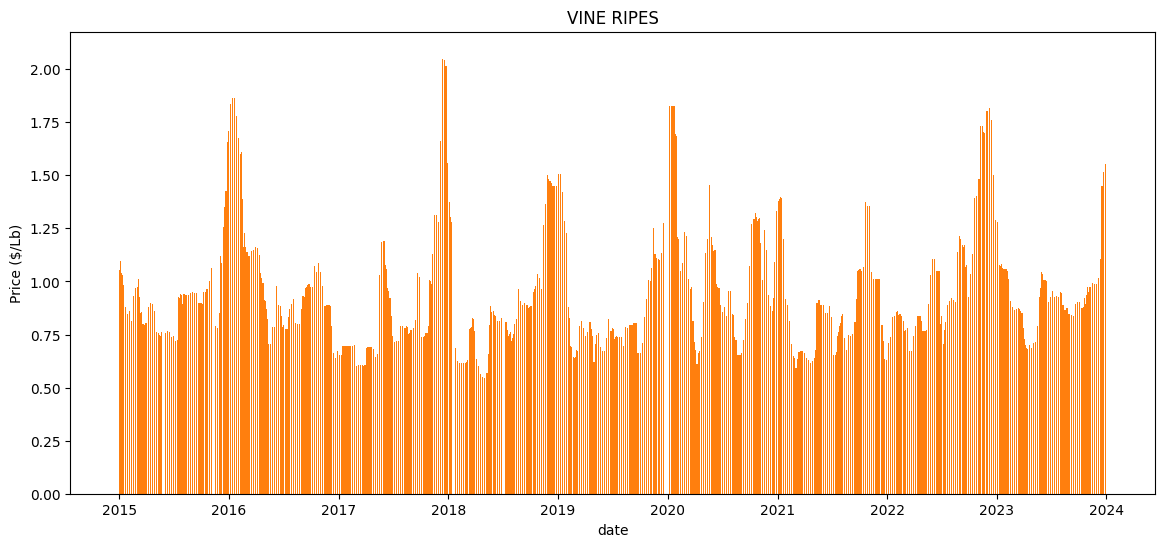

In [26]:
fig,ax = plt.subplots(1,1,figsize=(14,6))
ax.bar(onevarietydf.index, onevarietydf.ppp, color='tab:orange', width=1)
ax.set_xlabel('date')
ax.set_ylabel('Price ($/Lb)')

plt.title(variety)
plt.show()